In [1]:
%matplotlib inline
import os
os.chdir('../../util/')
import numpy as np
np.random.seed(2)

**Exercise 10.2. [Purpose: to be sure you really undersatnd the JAGS program for Figure 10.4.]**

**(A)** Use the script `Jags-Ydich-Xnom1subj-MbernBetaModelComp.R` to reproduce Figure 10.4, including both the prior and the posterior. Explain how you generated the MCMC sample from the prior. Include the graphical output in your answer, which will be slightly different than Figure 10.4 because of randomness in the MCMC chain

We are generating the MCMC sample from the prior by assuming that no data was observed. 

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [m, z_obs_0, z_obs_1, z_obs_2, z_obs_3, z_obs_4, z_obs_5, z_obs_6, z_obs_7, z_obs_8]
>NUTS: [thetas]


Sampling 4 chains for 1_000 tune and 12_500 draw iterations (4_000 + 50_000 draws total) took 53 seconds.
The number of effective samples is smaller than 25% for some parameters.
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


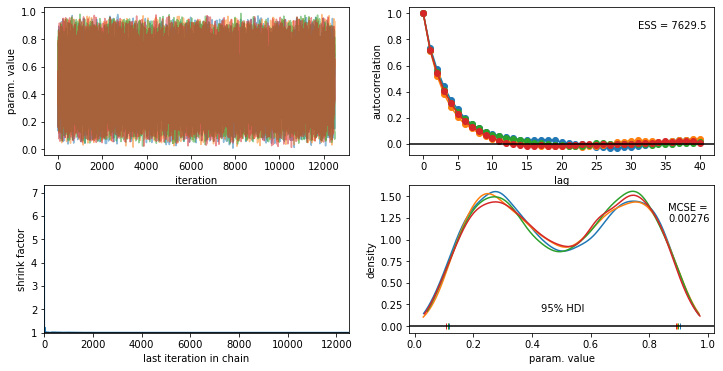

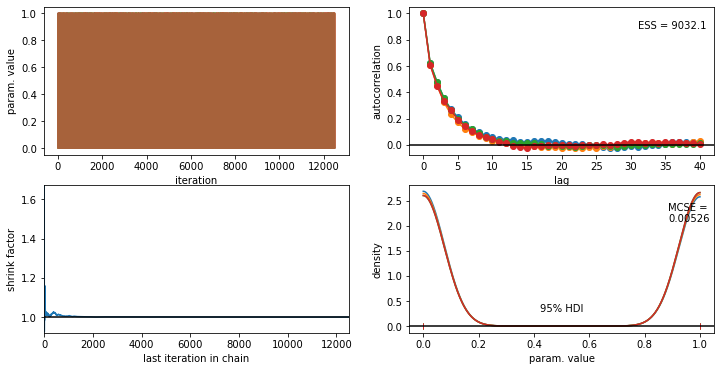

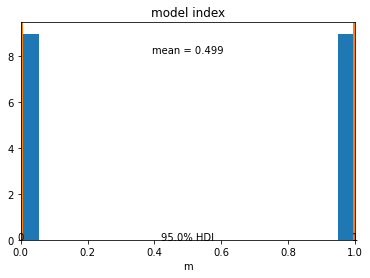

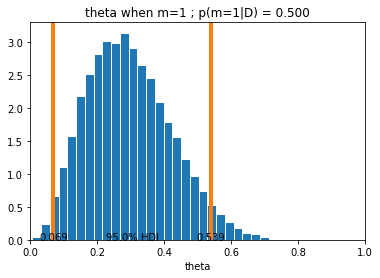

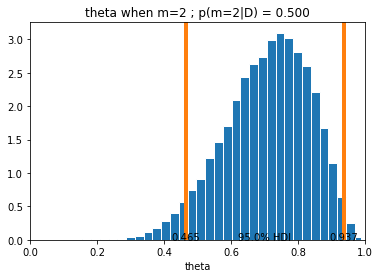

In [2]:
# Prior
with open('jags_ydich_xnom1subj_mbernbetamodelcomp.py', 'r') as f:
    code = ''.join(f.readlines())
code = code.replace('observed = y[i]', 'observed = None')
exec(''.join(code))

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [m]
>NUTS: [thetas]


Sampling 4 chains for 1_000 tune and 12_500 draw iterations (4_000 + 50_000 draws total) took 28 seconds.
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


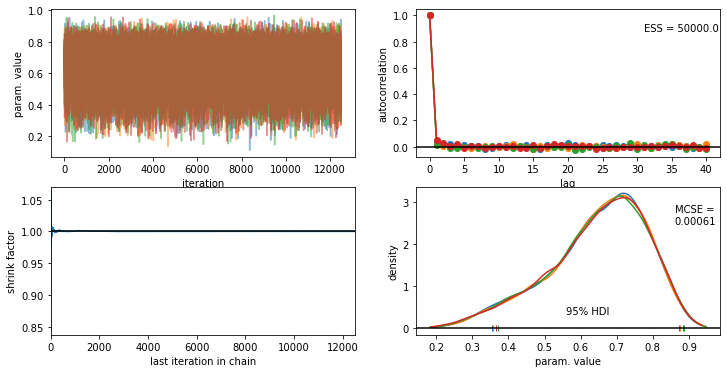

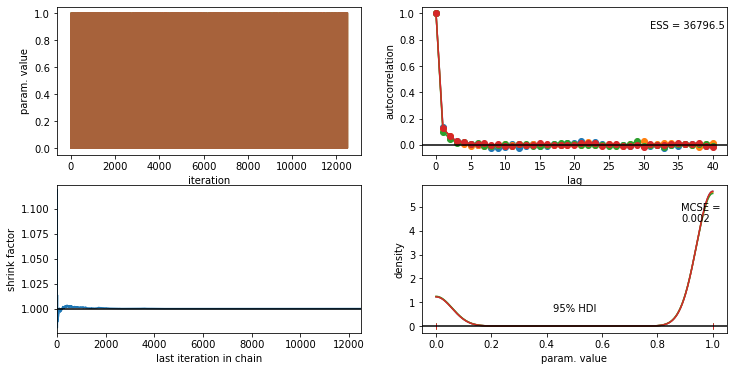

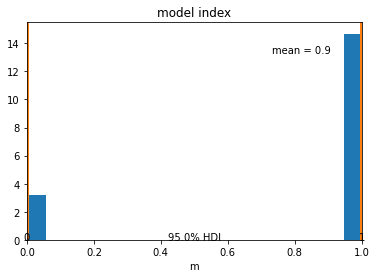

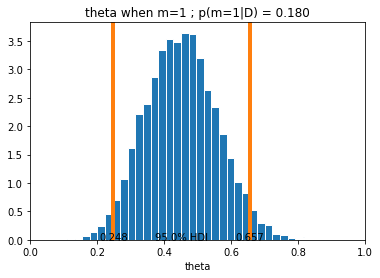

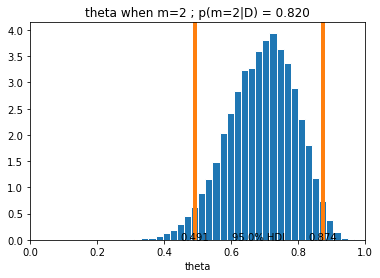

In [3]:
# Posterior
with open('jags_ydich_xnom1subj_mbernbetamodelcomp.py', 'r') as f:
    code = ''.join(f.readlines())
exec(''.join(code))

**(B)** Make a histogram of the $\theta$ values collapsed across both models. It sould look like the bottom-middle panel of Figure 10.3. Explain why.

We can look at the `diag_mcmc` output for the $\theta$ parameter in the previous cell. The theta posterior is a mixture of the thetas posteriors, weighted by the posterior for $m$. The posterior for $m=1$ is much higher than for $m=0$. That's why the mode is much closer to $\theta_1$ than to $\theta_0$. However, a 'bump' can be seen on the left hand side of the plot that corresponds to the contribution of $\theta_0$'s mode. 

**(C)** Use the script to reproduce the previous exercise. That is, change the data to $z=7$ heads in $N=10$, and run the script once with $\kappa$=6 and once with $kappa=202$. Do the MCMC results match the analytical results?

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [m]
>NUTS: [thetas]


Sampling 4 chains for 1_000 tune and 12_500 draw iterations (4_000 + 50_000 draws total) took 28 seconds.
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


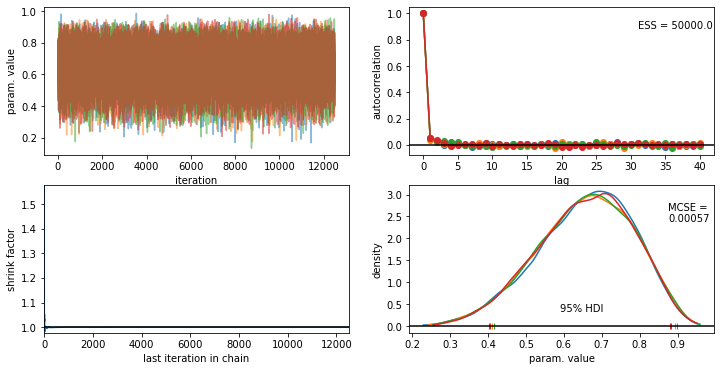

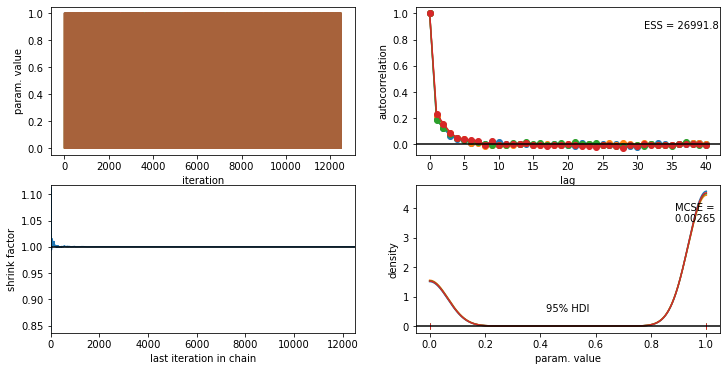

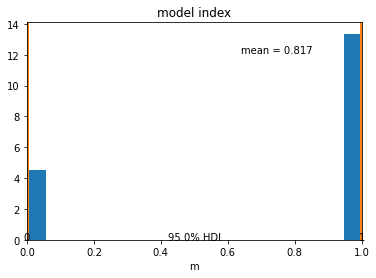

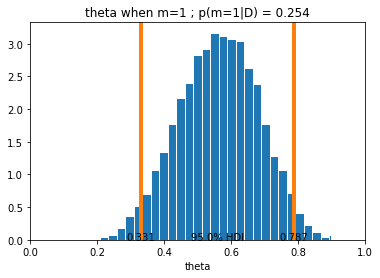

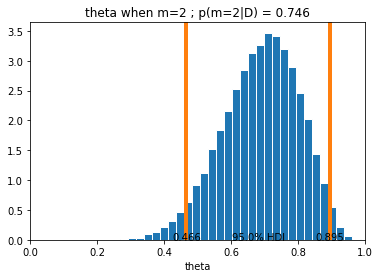

In [4]:
# kappa = 6
with open('jags_ydich_xnom1subj_mbernbetamodelcomp.py', 'r') as f:
    code = ''.join(f.readlines())
code = code.replace('n = 9', 'n = 10') \
           .replace('z = 6', 'z = 7') \
           .replace('kappa = 12', 'kappa = 6')
exec(''.join(code))

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [m]
>NUTS: [thetas]


Sampling 4 chains for 1_000 tune and 12_500 draw iterations (4_000 + 50_000 draws total) took 30 seconds.
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


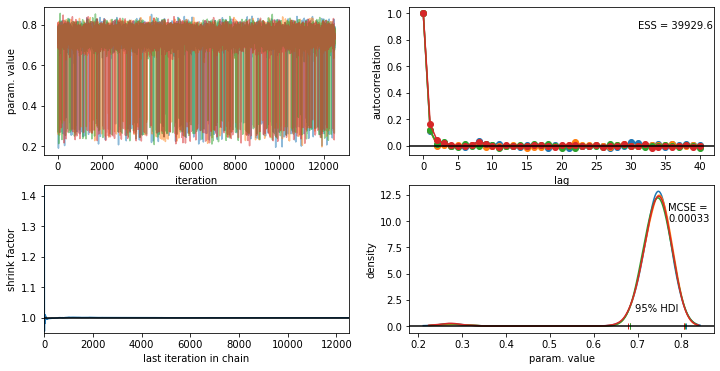

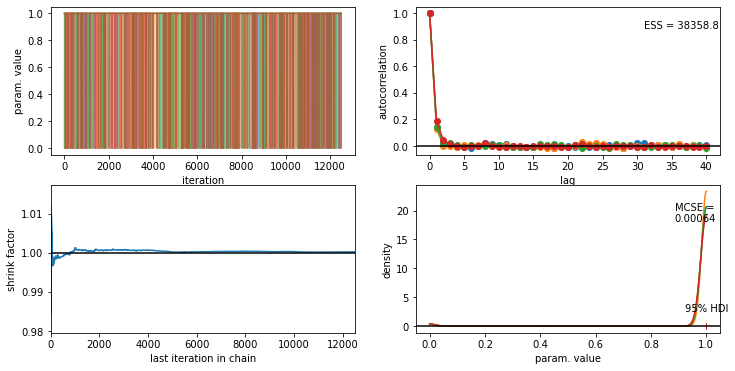

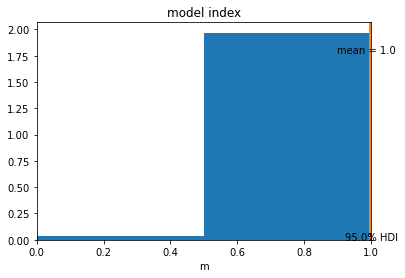

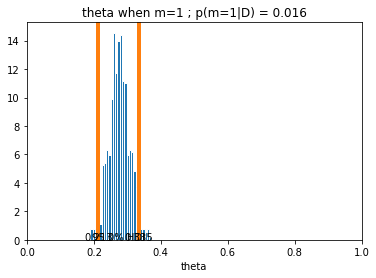

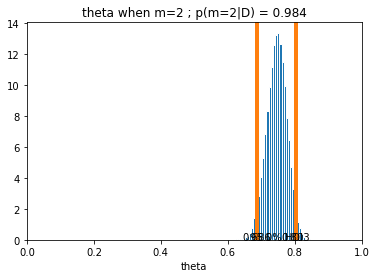

In [5]:
# kappa = 202
with open('jags_ydich_xnom1subj_mbernbetamodelcomp.py', 'r') as f:
    code = ''.join(f.readlines())
code = code.replace('n = 9', 'n = 10') \
           .replace('z = 6', 'z = 7') \
           .replace('kappa = 12', 'kappa = 202')
exec(''.join(code))

Yes, the posteriors $p(m=1|D)$ and $p(m=2|D)$ are very close of those in exercise 10.1. for both values of $\kappa$.